# DAV 5400

# Project 1: Exploratory Data Analysis Using Matplotlib & Seaborn


# Jordan Armstrong
# Yitzhar Shalom
# Mark Kaplan

## Introduction
We have chosen to work with Major League Baseball player data from the 2021 season. We plan to evaluate how different different defensive positions compare with respect to their offensive contribution. These types of studies are crucial as teams want to maximize the production out of their players, and need to know the production of their particular players versus the rest of the league.

## Data Summary
The majority of players in baseball (excluding the Designated Hitter (DH) and Pitcher (P) in the American League) play both sides of the game, offense and defense. As certain defensive positions are significantly harder to play well (notably Shortstop (SS), Catcher (C), and (CF)) teams are willing to sacrifice a certain amount of offensive production in return for defensive production. Conversly, players with easier defensive positions (corner outfielders (RF and LF, right field and left field respectively) and first basemen (1B)) are expected to provie above average offensive production. See the following articles for more information:
https://blogs.fangraphs.com/the-issue-of-positional-inequality/
https://blogs.fangraphs.com/position-adjustments/

The data we are going to be exploring is from the 2021 MLB season, across both leagues. We have obtained it from the FanGraphs splits leaderboards. (https://www.fangraphs.com/leaders/splits-leaderboards?splitArr=&splitArrPitch=&position=B&autoPt=true&splitTeams=false&statType=player&statgroup=1&startDate=2021-03-01&endDate=2021-11-01&players=&filter=&groupBy=season&sort=-1,1)

We have limited the data to players with 400 plate appearances as that is the minimum amount at which players are considered every-day players (starters) and also at which many stats start to stablize across a season. (See: https://library.fangraphs.com/principles/sample-size/) This accounts for 123 individual players.

The statistics we plan to explore are three basic and important offensive measures. Stolen bases (SB), which are typically associated with speedy, defensive minded players (SS and CF); Homeruns (HR), which are typically associated with powerful offensive positions (1B, RF, and LF), and wrc+ (weighted runs created plus) which is an overall offensive summary statistic. (See here: https://library.fangraphs.com/offense/wrc/).

SB and HR are both integers, and wrc+ is a float. The categorical data are the positions of each player. Eight in total, in addition to the ones mentioned above: 2B and 3B representing second basemen and third basemen respectively; we are ignoring Pitchers and Designated Hitters as DH's are only present in one league and therefore Pitchers only hit in one league).

## Exploratory Data Analysis

%matplotlib notebook

In [2]:
#relevant libraries are imported
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

data = pd.read_csv('/Users/kaplan/Downloads/leaderboards.csv')
print(data)

     HR  SB        wRC+ Position
0    16   2   88.002519       1B
1    22   6  112.114073       1B
2    12   5  106.362629       1B
3    35   1  140.853526       1B
4    31   8  135.151792       1B
..   ..  ..         ...      ...
117  29   1  116.384826       RF
118  30   4  161.907222       RF
119  13   1  104.617200       RF
120  27  12  139.961471       RF
121  28   9  164.951190       RF

[122 rows x 4 columns]


In order to confirm that there are no missing entries, the "isnull" operator is utilized. 

In [3]:
print(data.isnull().values.any())

False


Next, we extract each parameter on its own to be graphically analyzed. 

In [27]:
#renaming each variable to be analyzed
home_runs = data["HR"]
stolen_bases = data["SB"]
wRCplus = data["wRC+"]
position = data["Position"]

We provide the basic summary statistics accross the data.

In [10]:
data[["HR", "SB", "wRC+"]].describe()


,HR,SB,wRC+
count,122.000000,122.000000,122.000000
mean,19.680328,7.524590,113.345739
std,9.725375,8.134421,24.065315
min,2.000000,0.000000,56.825177
25%,12.000000,2.000000,99.077850
50%,18.000000,5.000000,110.747197
75%,27.000000,12.000000,131.115079
max,41.000000,47.000000,170.306253


Note: the average wrc+ is 100. The higher the number the better the offensive production. Since we are analyzing starting players who take up the majority of PAs, their average wrc+ will be higher than the average player.

Now we will create histograms and box plots for each stat across all positions in order to analyze the distribution of 
the data. 

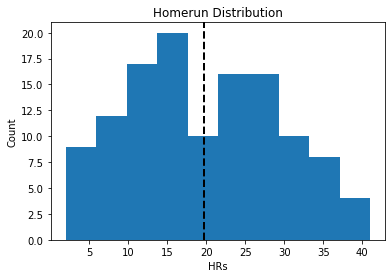

In [14]:
mean_length=data['HR'].mean()
plot_length = plt.hist(data['HR'])
plt.title('Homerun Distribution')
plt.xlabel('HRs')
plt.ylabel('Count')

plt.axvline(mean_length, color='k', linestyle='dashed', linewidth=2); # average

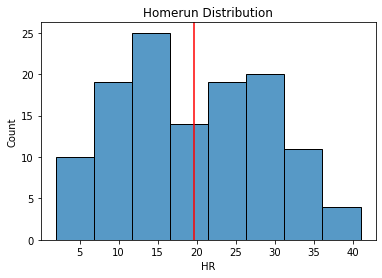

In [35]:
sns.histplot(x=data['HR']).set_title("Homerun Distribution")
plt.axvline(x=data.HR.mean(), color='red')

The stark contrast around the average may be explained by the polarization of defensive vs offensive players.

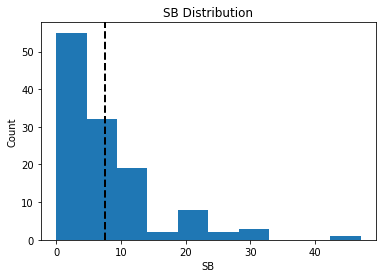

In [37]:
mean_length=data['SB'].mean()
plot_length = plt.hist(data['SB'])
plt.title('SB Distribution')
plt.xlabel('SB')
plt.ylabel('Count')
plt.axvline(mean_length, color='k', linestyle='dashed', linewidth=2); # average

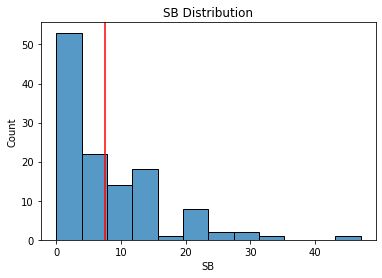

In [38]:
sns.histplot(x=data['SB']).set_title("SB Distribution")
plt.axvline(x=data.SB.mean(), color='red')

The SB distribution makes sense, as there are very few players who are fast enough to steal bases at a high enough percentage. 

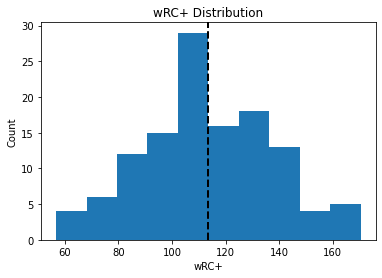

In [39]:
mean_length=data['wRC+'].mean()
plot_length = plt.hist(data['wRC+'])
plt.title('wRC+ Distribution')
plt.xlabel('wRC+')
plt.ylabel('Count')
plt.axvline(mean_length, color='k', linestyle='dashed', linewidth=2); # average

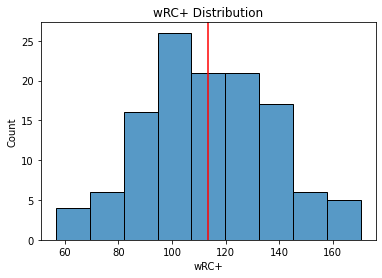

In [42]:
sns.histplot(x=data['wRC+']).set_title("wRC+ Distribution")
plt.axvline(x=wRCplus.mean(), color='red')

As noted above, with wRC+ being an overall offensive statistic, the distribution is close to normal, with many players being average (100); the average of starters being above 100, and a normal distribution.

In order to get a different perspective of the distribution of the parameters across the entire population of players, boxplots are generated. The range, median, and variance of the parameters are visible. 

Text(0.5, 0, ' ')

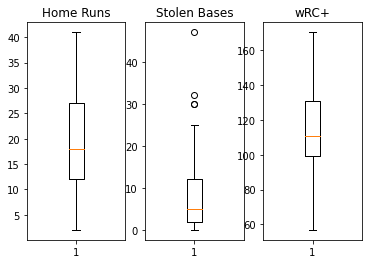

In [43]:
#creating subplot to generate side-by-side boxplots of stats across all positions

#define plotting space
plt.figure(1)

#left plot = home runs
#define data, title, blank x axis label 
plt.subplot(131)
plt.boxplot(data['HR'])
plt.title('Home Runs')
plt.xlabel(' ')

#middle plot = stolen bases
#define data, title, blank x axis label 
plt.subplot(132)
plt.boxplot(data['SB'])
plt.title('Stolen Bases')
plt.xlabel(' ')

#right plot = weighted runs created plus
#define data, title, blank x axis label 
plt.subplot(133)
plt.boxplot(data['wRC+'])
plt.title('wRC+')
plt.xlabel(' ')

Boxplots of each variable can also be generated using seaborn.

<AxesSubplot:xlabel='HR'>

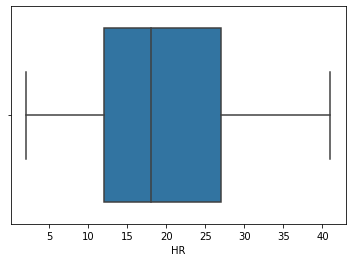

In [44]:
#boxplot of each variable accross all positions
sns.boxplot(x=data['HR'])

<AxesSubplot:xlabel='SB'>

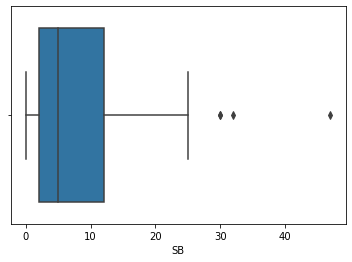

In [45]:
sns.boxplot(x=data['SB'])

<AxesSubplot:xlabel='wRC+'>

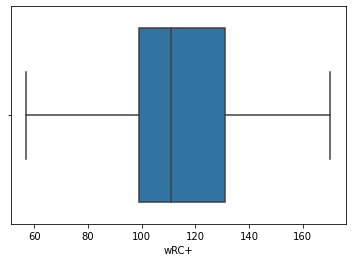

In [46]:
sns.boxplot(x=data['wRC+'])

Home runs per player range as far as 40 with a fair amount of variance and a symmetrical distribution. Stolen bases max at 25 per player excluding some outlier values, but with most of the values ranging on the lower end of the distribution. WRC+ displays symmetry and a wide variance, with values ranging from 60 to 170.

# Inference
After analyzing the distribution of the data, we will now compare the offensive statistics across each position. We will be using barplots to visually assess the offensive production per position. Since this part was done by a different team member using different techniques and labels, the first code will just be his intro and data loading.

In [47]:
bb = "https://raw.githubusercontent.com/jarmstro34/DAV-5400/main/leaderboards%20(3).csv"

In [48]:
stats = pd.read_csv(bb)

To create the Matplotlib I need to create new variables for the averages of all the positions.

In [49]:
df = pd.DataFrame(stats)

# I am trying to just pull out the positions from the DF, couldnt figure out how to do a "where" to do it in one. 
First = df.loc[df['Position'] == "1B"]
Second = df.loc[df['Position'] == "2B"]
Third = df.loc[df['Position'] == "3B"]
C = df.loc[df['Position'] == "C"]
SS = df.loc[df['Position'] == "SS"]
LF = df.loc[df['Position'] == "LF"]
CF = df.loc[df['Position'] == "CF"]
RF = df.loc[df['Position'] == "RF"]

First
# Creating the means for all the positions. The problem that I am running into is that matplotlib only wants to plot
#Them if they are part of the DF

#Average HR
First_HR = First["HR"].mean()
Second_HR = Second["HR"].mean()
Third_HR = Third["HR"].mean()
C_HR = C["HR"].mean()
SS_HR = SS["HR"].mean()
LF_HR = LF["HR"].mean()
CF_HR = CF["HR"].mean()
RF_HR = RF["HR"].mean()

#Average SB
First_SB = First["SB"].mean()
Second_SB = Second["SB"].mean()
Third_SB = Third["SB"].mean()
C_SB = C["SB"].mean()
SS_SB = SS["SB"].mean()
LF_SB = LF["SB"].mean()
CF_SB = CF["SB"].mean()
RF_SB = RF["SB"].mean()

#Average wRC+
First_wR = First["wRC+"].mean()
Second_wR = Second["wRC+"].mean()
Third_wR = Third["wRC+"].mean()
C_wR = C["wRC+"].mean()
SS_wR = SS["wRC+"].mean()
LF_wR = LF["wRC+"].mean()
CF_wR = CF["wRC+"].mean()
RF_wR = RF["wRC+"].mean()

averages = [First_SB, Second_SB, Third_SB, C_SB, SS_SB, LF_SB, CF_SB, RF_SB]

Stolen Bases Data

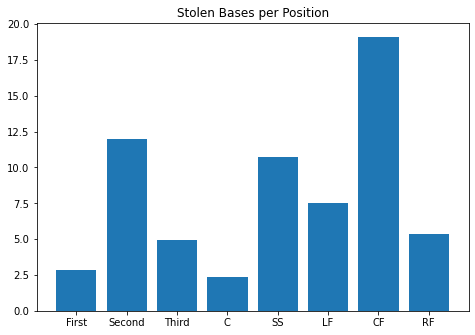

In [56]:
average_SB = [First_SB, Second_SB, Third_SB, C_SB, SS_SB, LF_SB, CF_SB, RF_SB]
Positions = ["First", "Second", "Third", "C", "SS", "LF", "CF", "RF"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Positions, average_SB)
plt.title('Stolen Bases per Position')
plt.show()

<AxesSubplot:xlabel='Position', ylabel='SB'>

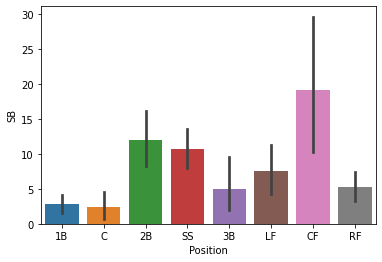

In [57]:
sns.barplot(x='Position', y='SB', data=stats, orient='v')

Something seems wrong with my ordering method, but the overall data makes sense, as first basemen and catchers, third basemen and right fielders are considered slower players, with 2B, SS, and CF considered faster players.

HR Data

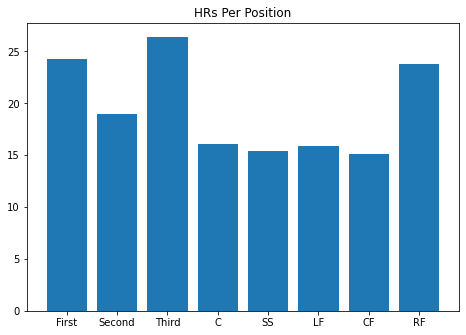

In [60]:
average_HR = [First_HR, Second_HR, Third_HR, C_HR, SS_HR, LF_HR, CF_HR, RF_HR]
Positions = ["First", "Second", "Third", "C", "SS", "LF", "CF", "RF"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Positions, average_HR)
plt.title("HRs Per Position")
plt.show()

<AxesSubplot:xlabel='Position', ylabel='HR'>

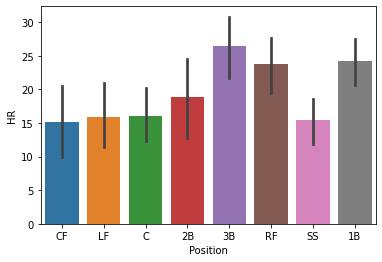

In [61]:
sns.barplot(x='Position', y='HR', data=stats, orient='v', order=plot_order)

This data fits with the trend, as power hitting corner indfielders and outfielders, such as 1B, 3B, and RF contriburting more HR than defensive positions such as CF, SS, and C.

wRC+ data:

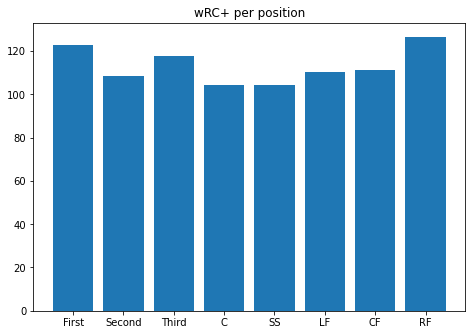

In [63]:
average_wR = [First_wR, Second_wR, Third_wR, C_wR, SS_wR, LF_wR, CF_wR, RF_wR]
Positions = ["First", "Second", "Third", "C", "SS", "LF", "CF", "RF"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Positions, average_wR)
plt.title("wRC+ per position")
plt.show()

<AxesSubplot:xlabel='Position', ylabel='wRC+'>

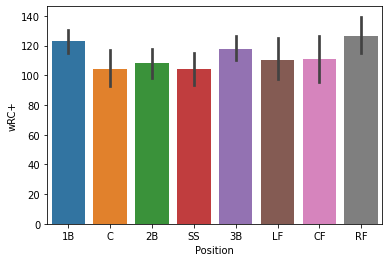

In [64]:
sns.barplot(x='Position', y='wRC+', data=stats, orient='v')

This chart also follows, with C and SS having a lower wRC+ than 1B, RF and 3B.

# Conclusion

We have analyzed the data of offensive statistics per position, and the idea that defensive-minded positions are worse offensivley seems to hold for most of the data.